In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Read the dataset using read_csv method
df = pd.read_csv("dataset/advertising.csv")

# See the top-5 records in the data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

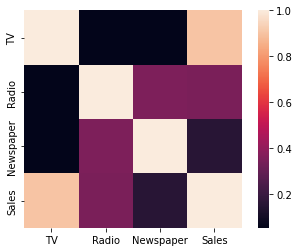

In [4]:
# plotting heatmap mencari korelasi
sns.heatmap(df.corr(), square=True)

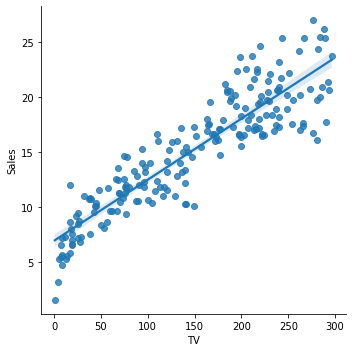

In [5]:
sns.lmplot(x='TV', y='Sales', data=df)

In [17]:
# Persiapan data x dan y
X = df[['TV']]
y = df.Sales

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.3, random_state = 10)

In [19]:
# Training Model Linear Regression / Membuat model
model = LinearRegression()

# Lakukan fit training untuk membentuk model
model.fit(X_train, y_train)

LinearRegression()

In [9]:
print(model.coef_)
print(model.intercept_)

[0.05239302 0.10752238 0.0004338 ]
4.912326442078989


In [11]:
# prediksi manual sederhana
biaya_iklan = 40
prediksi_penjualan = 0.05338906 * biaya_iklan + 7.150594888804455
print(prediksi_penjualan)

9.286157288804455


In [12]:
# prediksi menggunakan predict
model.predict([[biaya_iklan]])

c:\users\syl\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

In [37]:
# Prediksi data test (X_test)
y_pred = model.predict(X_test)

In [13]:
# Membandingkan nilai aktual dan hasil prediksi
aktual_prediksi = pd.DataFrame({
    'Aktual': y_test.values.flatten(), 
    'Prediksi': y_pred.flatten()})

aktual_prediksi.head(5)

NameError: name 'y_pred' is not defined

<AxesSubplot:>

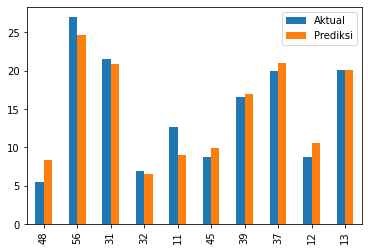

In [40]:
aktual_prediksi.sample(10).plot(kind='bar')

In [20]:
# cek score/accuracy pada model
model.score(X_test, y_test)

0.8288743166580128

In [42]:
# save the model to disk
import pickle

filename = 'model/linear_ads.sav'
pickle.dump(model, open(filename, 'wb'))